- 과적합
  - 실제 데이터와 머신러닝의 추정치가 일치하지 않는 현상
    - 과소적합 : 분석모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못함
      - 모델이 단순하다는 것은 변수(피쳐)가 부족하다는 의미
        - 파라미터가 더 많은 모델을 선택하거나 학습 알고리즘에 더 좋은 특성을 제공(하이퍼파라미터 튜닝)
    - 과대적합 : 훈련 데이터에 있는 잡음의 양이 모델에 비해서 너무 복잡한 경우
      - 설명력에 비해 잔차가 큰 경우
        - 파라미터가 더 적은 모델을 사용하는 등의 조치로 모델을 단순화
        - 훈련데이터의 잡음을 줄임(이상치 제거)
        - 변수 개수를 줄임

In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [7]:
df = pd.read_excel("./data/fish.xlsx")

In [11]:
df.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [13]:
df2 = df[['길이', '무게']].copy()
df2.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [14]:
X = df2[['길이']]
Y = df2['무게']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [37]:
model1 = LinearRegression()

In [38]:
fit1 = model1.fit(x_train, y_train)

In [39]:
print("계수(기울기): ", fit1.coef_)
print("절편: ", fit1.intercept_)
print("훈련 데이터 설명력: ", fit1.score(x_train, y_train))
print("검증 데이터 설명력: ", fit1.score(x_test, y_test))

"y = {0:0.2f} * X + {1:0.2f}".format(fit1.coef_[0], fit1.intercept_)

계수(기울기):  [37.27585139]
절편:  -645.710314360562
훈련 데이터 설명력:  0.925239255510842
검증 데이터 설명력:  0.8897778545053444


'y = 37.28 * X + -645.71'

In [40]:
fit1.predict(x_test)

array([808.04788997, 379.37559895, 714.85826149, 271.27562991,
       137.0825649 , -86.57254346, 379.37559895, 733.49618719,
       808.04788997, 371.92042867,   2.88949988, 137.0825649 ,
       308.55148131, 211.63426768, 379.37559895, 845.32374137,
       576.93761134])

In [41]:
mean_absolute_error(y_test, fit1.predict(x_test))

82.96029979126669

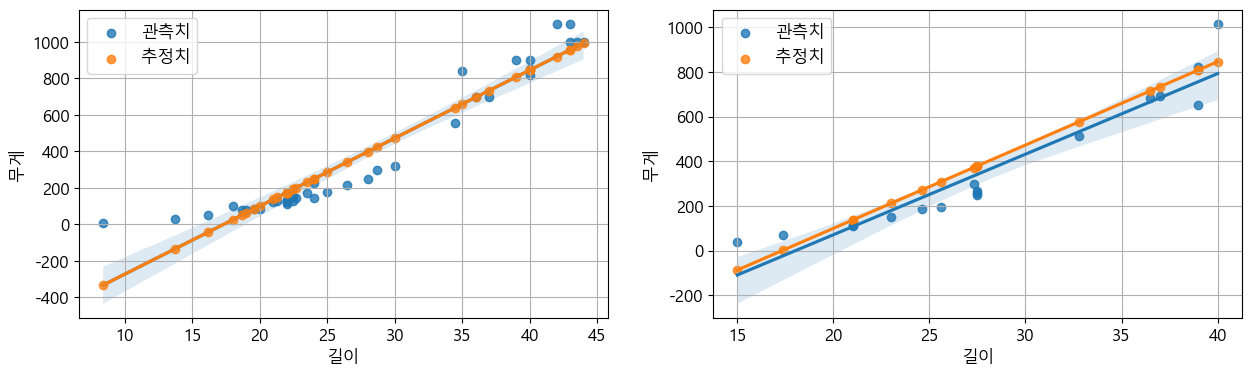

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

sns.regplot(x=x_train['길이'], y=y_train, ax=ax1, label='관측치')
sns.regplot(x=x_train['길이'], y=fit1.predict(x_train), ax=ax1, label='추정치')

sns.regplot(x=x_test['길이'], y=y_test, ax=ax2, label='관측치')
sns.regplot(x=x_test['길이'], y=fit1.predict(x_test), ax=ax2, label='추정치')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [58]:
X2 = X ** 3
X2.head()

,길이
0,592.704
1,2571.353
2,3375.000
3,4251.528
4,5268.024


In [61]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.3, random_state = 0)

In [62]:
model2 = LinearRegression()

In [63]:
fit2 = model2.fit(x2_train, y2_train)

In [69]:
print("계수(기울기): ", fit2.coef_)
print("절편: ", fit2.intercept_)
print("훈련 데이터 설명력: ", fit2.score(x2_train, y2_train))
print("검증 데이터 설명력: ", fit2.score(x2_test, y2_test))

"y = {0:0.2f} * X + {1:0.2f}".format(fit2.coef_[0], fit2.intercept_)

계수(기울기):  [0.01351493]
절편:  -4.56037905982123
훈련 데이터 설명력:  0.9710702843500897
검증 데이터 설명력:  0.9630505192905082


'y = 0.01 * X + -4.56'

In [65]:
fit2.predict(x2_test)

array([797.13197325, 276.50800779, 652.63199147, 196.63557402,
       120.60142196,  41.05252219, 276.50800779, 680.01155779,
       797.13197325, 270.42009778,  66.63661604, 120.60142196,
       222.1825829 , 159.8758193 , 276.50800779, 860.39537792,
       472.34854675])

In [66]:
mean_absolute_error(y2_test, fit2.predict(x2_test))

32.76642223186952

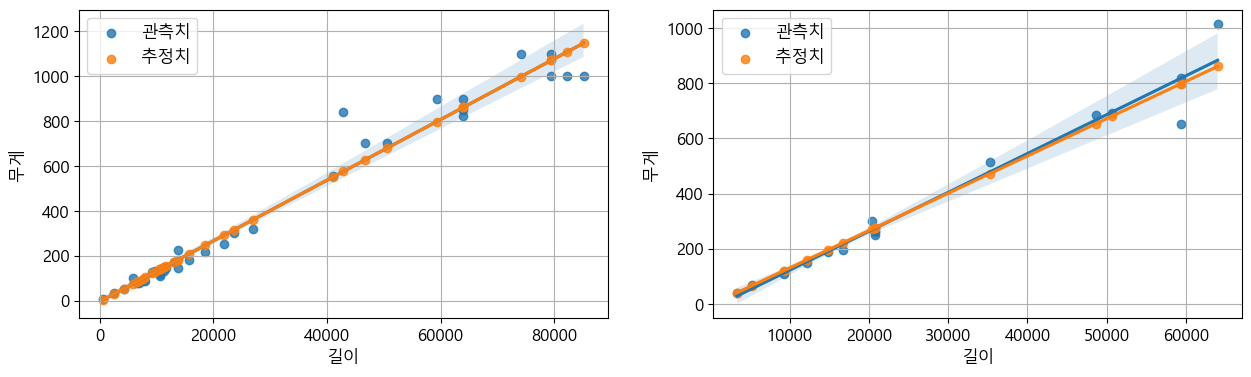

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

sns.regplot(x=x2_train['길이'], y=y2_train, ax=ax1, label='관측치')
sns.regplot(x=x2_train['길이'], y=fit2.predict(x2_train), ax=ax1, label='추정치')

sns.regplot(x=x2_test['길이'], y=y2_test, ax=ax2, label='관측치')
sns.regplot(x=x2_test['길이'], y=fit2.predict(x2_test), ax=ax2, label='추정치')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.show()
plt.close()